In [4]:
from CNNTextClassifier import *
import datetime
from utils import *
from evaluate import *

ImportError: attempted relative import with no known parent package

In [5]:
from utils import ucitajPodatke
train_set, val_set, test_set, sve_kategorije = ucitajPodatke('../')

FileNotFoundError: [Errno 2] No such file or directory: '../glagoli_train.txt'

In [16]:
emb_size=300
out_size=len(sve_kategorije)
batch_size=50
output_dir="results/{:%Y%m%d_%H%M%S}/".format(datetime.now())
epochs=500
lr=0.005
filter_sizes=[1,2,3,5]
num_filters = 36
dropout_rate=0.1
train = False #ako želimo trenirati postavimo na True, a ako samo želimo evaluirati postojeći model onda na False
if train:
    ft = ucitajFasttext('../../')
    weights_matrix = getWeightsMatrix(char_list,ft)
else:
    weights_matrix = torch.from_numpy(np.zeros((len(char_list)+1, emb_size))).float() #dummy matrix da se ne mora ucitavati fasttext

In [17]:
# definiranje modela
model = CNN_Text(out_size, vocab_len, emb_size, weights_matrix, filter_sizes, num_filters, dropout_rate)
if train:
    model = model.to("cuda")

In [14]:
## ako zelimo trenirati
from trainModel import *
model_weights_path = train(model, train_set, val_set, batch_size, output_dir, epochs, lr)
print('naučene težine modela u spremljene u:', model_weights_path)

train loss 0.264, val loss 0.280, val accuracy 0.921, and val rmse 0.718
train loss 0.047, val loss 0.266, val accuracy 0.945, and val rmse 0.423
train loss 0.049, val loss 0.297, val accuracy 0.955, and val rmse 0.304
train loss 0.032, val loss 0.397, val accuracy 0.957, and val rmse 0.360
train loss 0.033, val loss 0.410, val accuracy 0.963, and val rmse 0.271
train loss 0.029, val loss 0.519, val accuracy 0.958, and val rmse 0.354
train loss 0.025, val loss 0.550, val accuracy 0.960, and val rmse 0.290
train loss 0.029, val loss 0.550, val accuracy 0.952, and val rmse 0.425
train loss 0.018, val loss 0.589, val accuracy 0.962, and val rmse 0.302
train loss 0.028, val loss 0.631, val accuracy 0.957, and val rmse 0.323
naučene težine modela u spremljene u: results/20211124_223131/model.weights


Final evaluation on test set
test loss 0.169, test accuracy 0.950, test rmse 0.526, test microF1 0.841, test macroF1 0.950, test weightedF1 0.948
tensor([[0.9834, 0.0055, 0.0000, 0.0028, 0.0000, 0.0055, 0.0028],
        [0.0265, 0.9292, 0.0000, 0.0442, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.8000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3077, 0.0000, 0.6923, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000, 0.2000, 0.0000],
        [0.0000, 0.0227, 0.0000, 0.0000, 0.0227, 0.8864, 0.0682],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000]])


/home/rcoric/klasifikacija/CNNClassification/evaluateModel.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + nazivi, rotation=90)
/home/rcoric/klasifikacija/CNNClassification/evaluateModel.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + nazivi)


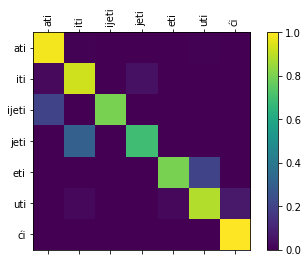

In [20]:
# evaluacija prethodno spremljenog modela
#model_weights_path='../results/20211116_130204/model.weights'
model_weights_path = 'results/hyperparameters/hp2/model.weights'
#model_weights_path = 'results/20211124_114930/model.weights'
model_weights_path = 'results/20211124_223131/model.weights'
evaluateOnTestSet(model, model_weights_path, test_set,sve_kategorije)

infinitiv završava na: ati


/home/rcoric/klasifikacija/CNNClassification/evaluateModel.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + nazivi)


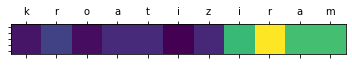

infinitiv završava na: ati


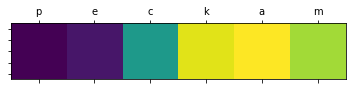

infinitiv završava na: ati


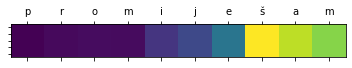

infinitiv završava na: ati


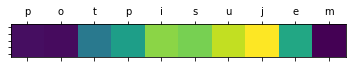

infinitiv završava na: ati


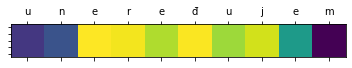

infinitiv završava na: ati


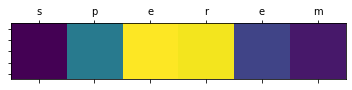

In [6]:
# heatmaps i predikcije za željene glagole
glagoli = ['kroatiziram','peckam','promiješam','potpisujem','uneređujem','sperem']
for gl in glagoli:
    #napravi heatmap
    heatmap(gl,model)